In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

In [2]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
merged_data = pd.merge(transactions, customers, on='CustomerID')

In [4]:
# Create customer features
customer_data = merged_data.groupby('CustomerID').agg(
    total_spending=('TotalValue', 'sum'),
    purchase_frequency=('TransactionID', 'count'),
    unique_products=('ProductID', 'nunique')
).reset_index()

In [5]:
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['total_spending', 'purchase_frequency', 'unique_products']])

In [6]:
# Try clustering with KMeans and calculate Davies-Bouldin Index for different cluster sizes
db_scores = []
sil_scores = []
k_range = range(2, 11)  # Try clusters from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)
    db_score = davies_bouldin_score(customer_data_scaled, customer_data['Cluster'])
    sil_score = silhouette_score(customer_data_scaled, customer_data['Cluster'])
    db_scores.append(db_score)
    sil_scores.append(sil_score)

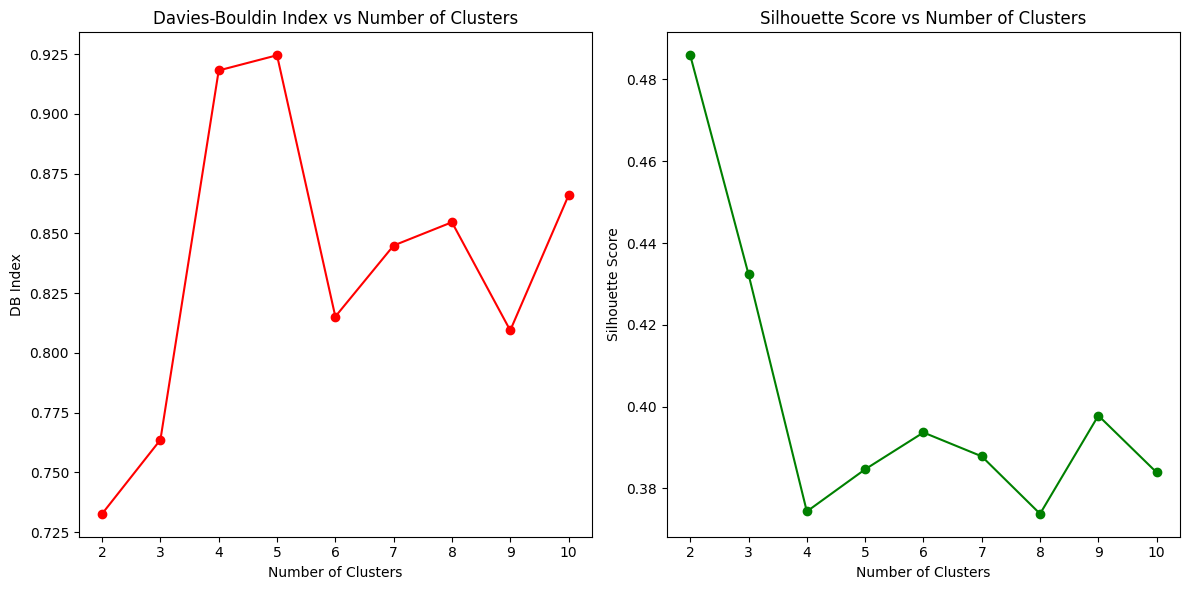

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, db_scores, marker='o', color='r')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')

plt.subplot(1, 2, 2)
plt.plot(k_range, sil_scores, marker='o', color='g')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [10]:
kmeans = KMeans(n_clusters=2, random_state=10)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

In [11]:
db_index = davies_bouldin_score(customer_data_scaled, customer_data['Cluster'])
sil_score = silhouette_score(customer_data_scaled, customer_data['Cluster'])

print(f"Clustering Metrics: \nDavies-Bouldin Index: {db_index}\nSilhouette Score: {sil_score}")

Clustering Metrics: 
Davies-Bouldin Index: 0.7379755643436297
Silhouette Score: 0.4795880365369778


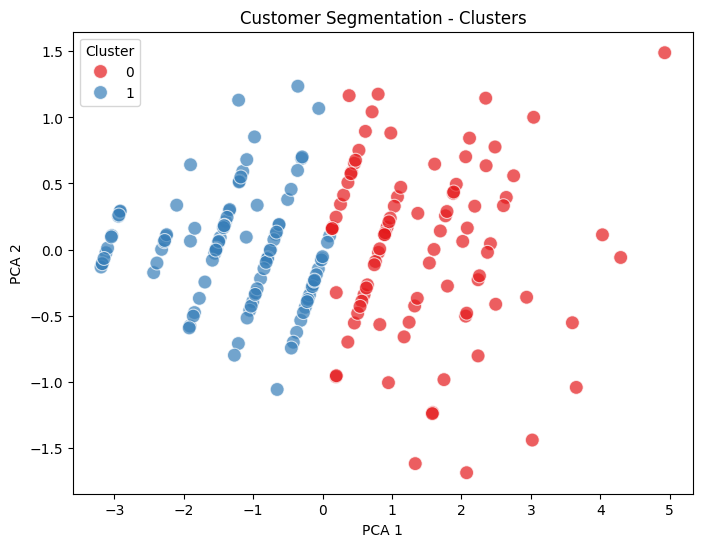

In [12]:
pca = PCA(n_components=2)
customer_data_pca = pca.fit_transform(customer_data_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=customer_data_pca[:, 0], y=customer_data_pca[:, 1], hue=customer_data['Cluster'], palette='Set1', s=100, alpha=0.7)
plt.title('Customer Segmentation - Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()